scale : 2.0
2.0 5 2
20


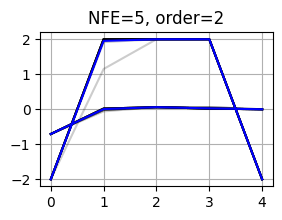

2.0 5 3
20


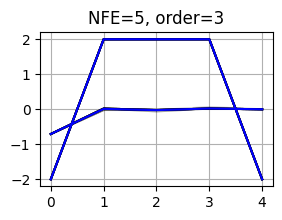

2.0 6 2
8


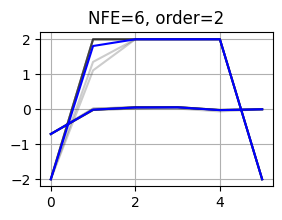

2.0 6 3


ValueError: need at least one array to stack

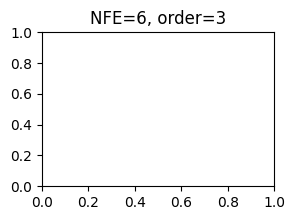

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

for scale in [2.0]: 
    print('scale :', scale)   
    for NFE in [5, 6, 8, 10, 12, 15, 20]:
        for order in [2, 3]:
            print(scale, NFE, order)
            root_dir = f'/data/guided-diffusion/scale/rbf_ecp_marginal_sep{scale}'
            optimal_log_scales_list = []
            plt.figure(figsize=[3, 2])
            plt.title(f"NFE={NFE}, order={order}")
            for number in range(100):
                npz_file = os.path.join(root_dir, f'NFE={NFE},p={order},number={number}.npz')
                if not os.path.exists(npz_file):
                    continue
                data = np.load(npz_file)
                plt.plot(data['optimal_log_scales'].T, color='black', alpha=0.2)
                optimal_log_scales_list.append(data['optimal_log_scales'])
            optimal_log_scales = np.stack(optimal_log_scales_list, axis=0)
            print(len(optimal_log_scales))
            optimal_log_scales = np.mean(optimal_log_scales, axis=0)
            save_file = os.path.join(root_dir, f'NFE={NFE},p={order}.npz')
            np.savez(save_file, optimal_log_scales=optimal_log_scales)
            data = np.load(save_file)
            plt.plot(data['optimal_log_scales'].T, color='blue')
            plt.grid()
            plt.show()
            
